<a href="https://colab.research.google.com/github/AhmedAli807/AhmedAli807/blob/main/Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Libraries**

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install ipython-sql
!pip install --upgrade ipython-sql prettytable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00


# **Install Magic Line**

In [3]:
%load_ext sql

#  **Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [38]:
df=pd.read_excel('/content/insurance.xlsx')
conn=sqlite3.connect('insurance.db')
cursor=conn.cursor()
df.to_sql('insurance',conn,if_exists='replace',index=False)
df_sql=pd.read_sql('SELECT * FROM insurance',conn)

In [39]:
df_sql.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
df_sql.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
%sql sqlite:////content/insurance.db


In [10]:
%sql SELECT * FROM insurance LIMIT 5;

 * sqlite:////content/insurance.db
Done.


age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33.0,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552


# ** AVG Smoker and non-smoker**

In [11]:
count_smoker = %sql SELECT COUNT(*) FROM insurance WHERE smoker = 'yes';
count_non_smoker = %sql SELECT COUNT(*) FROM insurance WHERE smoker = 'no';
print(count_smoker)
print(count_non_smoker)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+----------+
| COUNT(*) |
+----------+
|   274    |
+----------+
+----------+
| COUNT(*) |
+----------+
|   1064   |
+----------+


In [22]:
count_female_smoker=%sql SELECT COUNT(*) FROM insurance WHERE smoker = 'yes' AND sex = 'female';
count_male_smoker=%sql SELECT COUNT(*) FROM insurance WHERE smoker = 'yes' AND sex = 'male';
print(count_female_smoker)
print(count_male_smoker)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+----------+
| COUNT(*) |
+----------+
|   115    |
+----------+
+----------+
| COUNT(*) |
+----------+
|   159    |
+----------+


# **Max Charges**

In [35]:
max_charges=%sql SELECT MAX(charges) FROM insurance;
max_female_smoker_charges=%sql SELECT MAX(charges) FROM insurance WHERE smoker = 'yes' AND sex = 'female';
max_male_smoker_charges=%sql SELECT MAX(charges) FROM insurance WHERE smoker = 'yes' AND sex = 'male';
max_female_non_smoker_charges=%sql SELECT MAX(charges) FROM insurance WHERE smoker = 'no' AND sex = 'female';
max_male_non_smoker_charges=%sql SELECT MAX(charges) FROM insurance WHERE smoker = 'no' AND sex = 'male';
print(max_charges)
print(max_female_smoker_charges)
print(max_male_smoker_charges)
print(max_female_non_smoker_charges)
print(max_male_non_smoker_charges)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+--------------+
| MAX(charges) |
+--------------+
| 63770.42801  |
+--------------+
+--------------+
| MAX(charges) |
+--------------+
| 63770.42801  |
+--------------+
+--------------+
| MAX(charges) |
+--------------+
| 62592.87309  |
+--------------+
+--------------+
| MAX(charges) |
+--------------+
| 36910.60803  |
+--------------+
+--------------+
| MAX(charges) |
+--------------+
| 32108.66282  |
+--------------+


# **Min Charges**

In [36]:
min_charges=%sql SELECT MIN(charges) FROM insurance;
min_female_charges_smoker=%sql SELECT MIN(charges) FROM insurance WHERE smoker = 'yes' AND sex = 'female';
min_male_charges_smoker=%sql SELECT MIN(charges) FROM insurance WHERE smoker = 'yes' AND sex = 'male';
min_female_charges_non_smoker=%sql SELECT MIN(charges) FROM insurance WHERE smoker = 'no' AND sex = 'female';
min_male_charges_non_smoker=%sql SELECT MIN(charges) FROM insurance WHERE smoker = 'no' AND sex = 'male';
print(min_charges)
print(min_female_charges_smoker)
print(min_male_charges_smoker)
print(min_female_charges_non_smoker)
print(min_male_charges_non_smoker)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+--------------+
| MIN(charges) |
+--------------+
|  1121.8739   |
+--------------+
+--------------+
| MIN(charges) |
+--------------+
|  13844.506   |
+--------------+
+--------------+
| MIN(charges) |
+--------------+
|  12829.4551  |
+--------------+
+--------------+
| MIN(charges) |
+--------------+
|  1607.5101   |
+--------------+
+--------------+
| MIN(charges) |
+--------------+
|  1121.8739   |
+--------------+


# **AVG Charges**

In [14]:
avg_charges=%sql SELECT ROUND(AVG(charges),2) FROM insurance;
print(avg_charges)

 * sqlite:////content/insurance.db
Done.
+-----------------------+
| ROUND(AVG(charges),2) |
+-----------------------+
|        13270.42       |
+-----------------------+


In [19]:
avg_smokers_charges=%sql SELECT ROUND(AVG(charges),2) FROM insurance WHERE smoker = 'yes';
print(avg_smokers_charges)

 * sqlite:////content/insurance.db
Done.
+-----------------------+
| ROUND(AVG(charges),2) |
+-----------------------+
|        32050.23       |
+-----------------------+


In [20]:
avg_non_smoker=%sql SELECT ROUND(AVG(charges),2) FROM insurance WHERE smoker = 'no';
print(avg_non_smoker)

 * sqlite:////content/insurance.db
Done.
+-----------------------+
| ROUND(AVG(charges),2) |
+-----------------------+
|        8434.27        |
+-----------------------+


In [25]:
avg_female_charges=%sql SELECT ROUND(AVG(charges),2) FROM insurance WHERE sex = 'female';
avg_female_smoker_charges=%sql SELECT ROUND(AVG(charges),2) FROM insurance WHERE smoker = 'yes' AND sex = 'female';
avg_female_non_smoker_charges=%sql SELECT ROUND(AVG(charges),2) FROM insurance WHERE smoker = 'no' AND sex = 'female';
avg_male_charges=%sql SELECT ROUND(AVG(charges),2) FROM insurance WHERE sex = 'male';
avg_male_smoker_charges=%sql SELECT ROUND(AVG(charges),2) FROM insurance WHERE smoker = 'yes' AND sex = 'male';
avg_male_non_smoker_charges=%sql SELECT ROUND(AVG(charges),2) FROM insurance WHERE smoker = 'no' AND sex = 'male';
print(avg_female_charges)
print(avg_female_smoker_charges)
print(avg_female_non_smoker_charges)
print(avg_male_charges)
print(avg_male_smoker_charges)
print(avg_male_non_smoker_charges)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+-----------------------+
| ROUND(AVG(charges),2) |
+-----------------------+
|        12569.58       |
+-----------------------+
+-----------------------+
| ROUND(AVG(charges),2) |
+-----------------------+
|        30679.0        |
+-----------------------+
+-----------------------+
| ROUND(AVG(charges),2) |
+-----------------------+
|         8762.3        |
+-----------------------+
+-----------------------+
| ROUND(AVG(charges),2) |
+-----------------------+
|        13956.75       |
+-----------------------+
+-----------------------+
| ROUND(AVG(charges),2) |
+-----------------------+
|        33042.01       |
+-----------------------+
+-----------------------+
| ROUND(AVG(charges),2) |
+-----------------------+
|         8087.2        |


# **Avg Ages**

In [18]:
avg_ages_smokers=%sql SELECT ROUND(AVG(age),0) FROM insurance WHERE smoker = 'yes';
print(avg_ages_smokers)

 * sqlite:////content/insurance.db
Done.
+-------------------+
| ROUND(AVG(age),0) |
+-------------------+
|        39.0       |
+-------------------+


In [17]:
avg_ages_non_smokers=%sql SELECT ROUND(AVG(age),0) FROM insurance WHERE smoker = 'no';
print(avg_ages_non_smokers)

 * sqlite:////content/insurance.db
Done.
+-------------------+
|      AVG(age)     |
+-------------------+
| 39.38533834586466 |
+-------------------+


# **Max BMI Female**

In [27]:
max_bmi_female_smoker=%sql SELECT MAX(bmi) FROM insurance WHERE smoker = 'yes' AND sex = 'female';
max_bmi_female_non_smoker=%sql SELECT MAX(bmi) FROM insurance WHERE smoker = 'no' AND sex = 'female';
print(max_bmi_female_smoker)
print(max_bmi_female_non_smoker)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+----------+
| MAX(bmi) |
+----------+
|   47.6   |
+----------+
+----------+
| MAX(bmi) |
+----------+
|  48.07   |
+----------+


# **Max BMI Male**

In [28]:
max_bmi_male_smoker=%sql SELECT MAX(bmi) FROM insurance WHERE smoker = 'yes' AND sex = 'male';
max_bmi_male_non_smoker=%sql SELECT MAX(bmi) FROM insurance WHERE smoker = 'no' AND sex = 'male';
print(max_bmi_male_smoker)
print(max_bmi_male_non_smoker)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+----------+
| MAX(bmi) |
+----------+
|  52.58   |
+----------+
+----------+
| MAX(bmi) |
+----------+
|  53.13   |
+----------+


# **Min BMI Female**

In [29]:
min_bmi_female_smoker=%sql SELECT MIN(bmi) FROM insurance WHERE smoker = 'yes' AND sex = 'female';
min_bmi_female_non_smoker=%sql SELECT MIN(bmi) FROM insurance WHERE smoker = 'no' AND sex = 'female';
print(min_bmi_female_smoker)
print(min_bmi_female_non_smoker)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+----------+
| MIN(bmi) |
+----------+
|  17.195  |
+----------+
+----------+
| MIN(bmi) |
+----------+
|  16.815  |
+----------+


# **Min BMI Male**

In [30]:
min_bmi_male_smoker=%sql SELECT MIN(bmi) FROM insurance WHERE smoker = 'yes' AND sex = 'male';
min_bmi_male_non_smoker=%sql SELECT MIN(bmi) FROM insurance WHERE smoker = 'no' AND sex = 'male';
print(min_bmi_male_smoker)
print(min_bmi_male_non_smoker)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+----------+
| MIN(bmi) |
+----------+
|  17.29   |
+----------+
+----------+
| MIN(bmi) |
+----------+
|  15.96   |
+----------+


# **Avg BMI Female**

In [31]:
avg_bmi_female_smoker=%sql SELECT ROUND(AVG(bmi),2) FROM insurance WHERE smoker = 'yes' AND sex = 'female';
avg_bmi_female_non_smoker=%sql SELECT ROUND(AVG(bmi),2) FROM insurance WHERE smoker = 'no' AND sex = 'female';
print(avg_bmi_female_smoker)
print(avg_bmi_female_non_smoker)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+-------------------+
| ROUND(AVG(bmi),2) |
+-------------------+
|       29.61       |
+-------------------+
+-------------------+
| ROUND(AVG(bmi),2) |
+-------------------+
|       30.54       |
+-------------------+


# **Avg BMI Male**

In [32]:
avg_bmi_male_smoker=%sql SELECT ROUND(AVG(bmi),2) FROM insurance WHERE smoker = 'yes' AND sex = 'male';
avg_bmi_male_non_smoker=%sql SELECT ROUND(AVG(bmi),2) FROM insurance WHERE smoker = 'no' AND sex = 'male';
print(avg_bmi_male_smoker)
print(avg_bmi_male_non_smoker)

 * sqlite:////content/insurance.db
Done.
 * sqlite:////content/insurance.db
Done.
+-------------------+
| ROUND(AVG(bmi),2) |
+-------------------+
|        31.5       |
+-------------------+
+-------------------+
| ROUND(AVG(bmi),2) |
+-------------------+
|       30.77       |
+-------------------+


# **Charges & smoker**

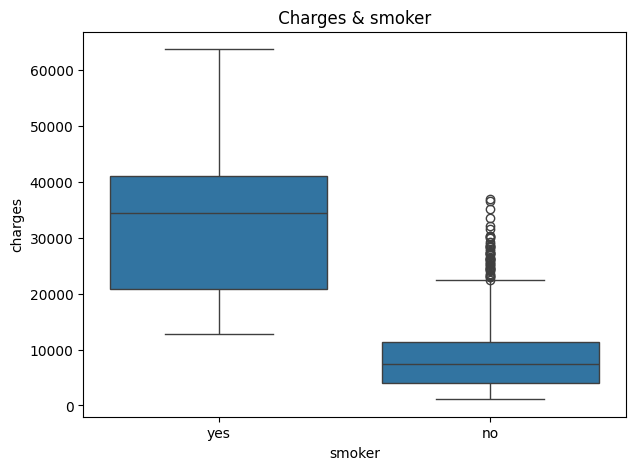

In [42]:
plt.figure(figsize=(7,5))
sns.boxplot(x="smoker", y="charges", data=df_sql)
plt.title(" Charges & smoker ")
plt.show()

# **BMI & Chargees**

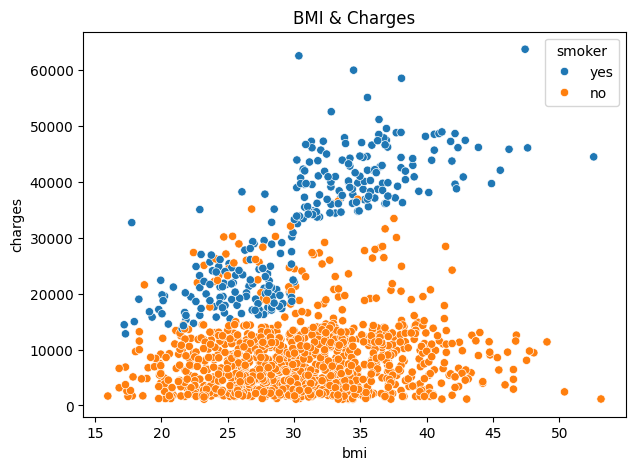

In [44]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="bmi", y="charges",hue='smoker', data=df_sql)
plt.title("BMI & Charges")
plt.show()

# **Ages & Charges**

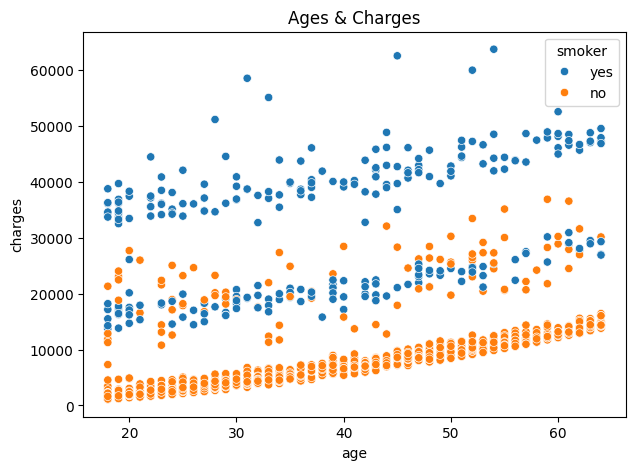

In [45]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="age", y="charges",hue='smoker', data=df_sql)
plt.title("Ages & Charges")
plt.show()

# **Region & Charges**

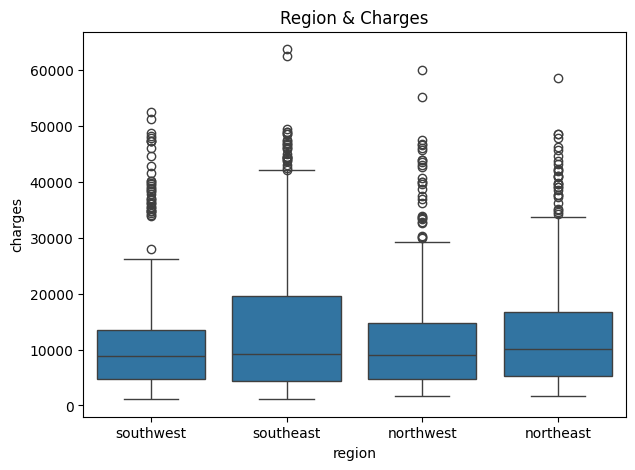

In [46]:
plt.figure(figsize=(7,5))
sns.boxplot(x="region", y="charges", data=df_sql)
plt.title("Region & Charges")
plt.show()
#